# Kuantumsal Hesaplamanın Temelleri Vize Soruları ve Cevapları


Ahmet Eralp Demirer

---




 




> 1. Bölüm

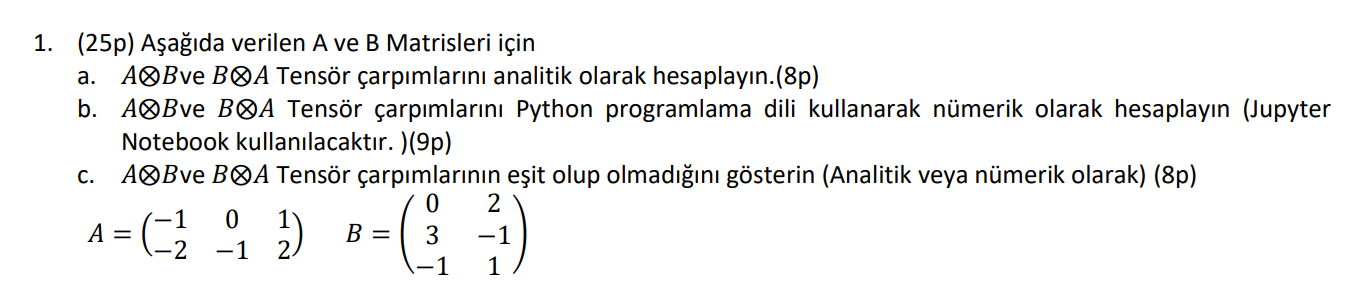



1.a
𝐴⨂𝐵 ve 𝐵⨂𝐴 tensör çarpımlarının analitik olarak hesabı:

      

A⨂B = için A matrisinin her bir elemanını B matrisi için çarpmalıyız;
    
     = (-1) x (0) = 0, (0) x (3) = 0, (1) x (-1) = -1
     = (-1) x (2) = -2, (0) x (-1) = 0, (1) x (1) = 1
     = (-2) x (0) = 0, (-1) x (3) = -3, (2) x (-1) = -2
     = (-2) x (2) = -4, (-1) x (-1) = 1, (2) x (1) = 2
\begin{bmatrix}
0 & 0 & -1 \\
-2 & 0 & 1 \\
0 & -3 & -2 \\
-4 & 1 & 2
\end{bmatrix}

B⨂A = için B matrisinin her bir elemanını A matrisi ile çarpmalıyız;
    
     = (0) x (-1) = 0, (2) x (0) = 0
     = (0) x (0) = 0, (2) x (1) = 2
     = (3) x (-1) = -3, (-1) x (-2) = 2
     = (3) x (0) = 0, (-1) x (-1) = 1
     = (-1) x (-1) = 1, (1) x (-2) = -2
     = (-1) x (0) = 0, (1) x (1) = 1 

\begin{bmatrix}
0 & 0 \\
0 & 2 \\
-3 & 2 \\
0 & 1 \\
1 & -2 \\
0 & 1
\end{bmatrix}

#1.b

In [ ]:
import numpy as np

A = np.array([[-1, 0, 1], [-2, -1, 2]])
B = np.array([[0, 2], [3, -1], [-1, 1]])

AB = np.kron(A, B)  # A⨂B nümerik çarpım için kronecker çarpımı uyguluyoruz
BA = np.kron(B, A)  # B⨂A nümerik çarpım için kronecker çarpımı uyguluyoruz

print("A⨂B =\n", AB)
print("\n")
print("B⨂A =\n", BA)



#1.c


𝐴⨂𝐵ve 𝐵⨂𝐴 tensör çarpımlarının eşit olup olmadığının kontolü

#### Analitik olarak bu iki tensör çarpımı eşit değildir, çünkü; 
#### Yukarıda da görüldüğü üzere oluşan iki matris birbirlerinden oldukça farklıdır. 𝐴⨂𝐵, 4x3 boyutlu bir tensörken, 𝐵⨂𝐴 ise 6x2 boyutlu bir tensördür. Bu nedenle, 𝐴⨂𝐵 ve 𝐵⨂𝐴 tensör çarpımları eşit olamaz.


```
#bu kod ile kontrol edebiliriz.
np.array_equal(AB, BA) 
```


#### Yukarıdaki kodun çıktısında da görüleceği üzere; nümerik olarak da bu iki çarpım matrisi birbirine eşit değildir.



In [ ]:
# Örneğimiz için False döndürecektir.
np.array_equal(AB, BA)


#2.
> 2.Bölüm

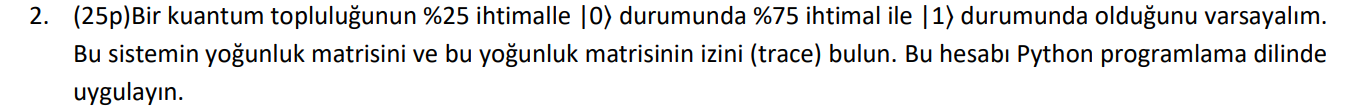

|0⟩⟨0| * 0.25  
|1⟩⟨1| * 0.75



```
iz(trace) = 0.25(|0⟩⟨0|'ın izi) + 0.75(|1⟩⟨1|'in izi)
= 0.25(1) + 0.75(1) = 1
```



In [ ]:
import numpy as np

# operatörler
P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])

# yoğunluk matrisi
mastrisYogunluk = 0.25 * P0 + 0.75 * P1
print("Yoğunluk matrisi:\n", mastrisYogunluk)

# yoğunluk matrisinin izi 
iz = np.trace(mastrisYogunluk)
print(" İz: ", iz)


#3.

> 3.Bölüm

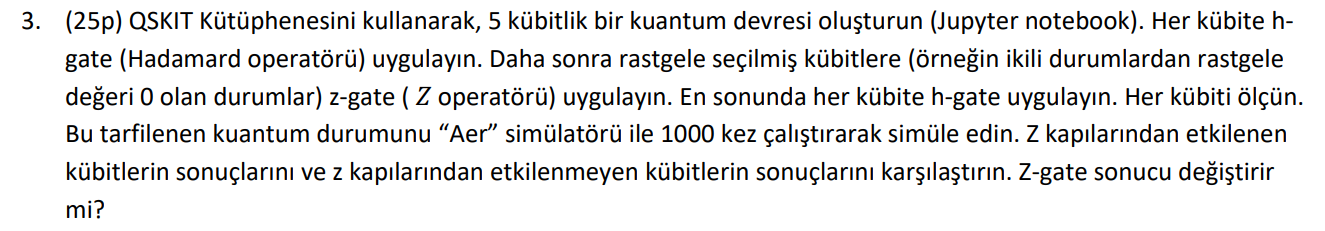


In [ ]:
#qiskit kütüphanesi

!pip install qiskit

#### Aşağıdaki kodda ikili değerleri '1' olan durumlara Z operatörü uygulanıyor. 

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram


# 5 kübitlik kuantum devresi
devre = QuantumCircuit(5)

# Hadamard kapılarının her kübite uygulanması
for qubit in range(5):
    devre.h(qubit)

# Random kübitler üzerinde Z kapıları
devre.z(0) # 1.index
devre.z(2) # 3.index
devre.z(4) # 5.index

# tekrar hadamard kapıları
for qubit in range(5):
    devre.h(qubit)

# kübit ölçüm
devre.measure_all()

# Aer simülatörü (1000)
simulator = Aer.get_backend('aer_simulator')
result = execute(devre, simulator, shots=1000).result()
counts = result.get_counts(devre)

# Sonuçları görüntüleyin
print(counts)


affected_counts = {}
unaffected_counts = {}

# ölçümleri kübit olarak sonuçları
for key in counts:
    if key[0] == '1' or key[2] == '1' or key[4] == '1':  
        affected_counts[key] = counts[key]
    else:
        unaffected_counts[key] = counts[key]

# kübitlerin sonucları
print("Etkilenen kübitlerin sonuçları:")
print(affected_counts)
print("\nEtkilenmeyen kübitlerin sonuçları:")
print(unaffected_counts)
print("--------------------------------")
plot_histogram(counts)



#### Aşağıdaki kodda ikili değerleri '0' olan durumlara Z operatörü uygulanıyor. 

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram


# 5 kübitlik kuantum devresi
devre = QuantumCircuit(5)

# Hadamard kapılarının her kübite uygulanması
for qubit in range(5):
    devre.h(qubit)

# Random kübitler üzerinde Z kapıları
devre.z(1) # 2.index
devre.z(3) # 4.index


# tekrar hadamard kapıları
for qubit in range(5):
    devre.h(qubit)

# kübit ölçüm
devre.measure_all()

# Aer simülatörü (1000)
simulator = Aer.get_backend('aer_simulator')
result = execute(devre, simulator, shots=1000).result()
counts = result.get_counts(devre)

# Sonuçları görüntüleyin
print(counts)


affected_counts = {}
unaffected_counts = {}

# ölçümleri kübit olarak sonuçları
for key in counts:
    if key[0] == '1' or key[2] == '1' or key[4] == '1':  
        affected_counts[key] = counts[key]
    else:
        unaffected_counts[key] = counts[key]

# kübitlerin sonucları
print("Etkilenen kübitlerin sonuçları:")
print(affected_counts)
print("\nEtkilenmeyen kübitlerin sonuçları:")
print(unaffected_counts)
print("--------------------------------")
plot_histogram(counts)

#4.
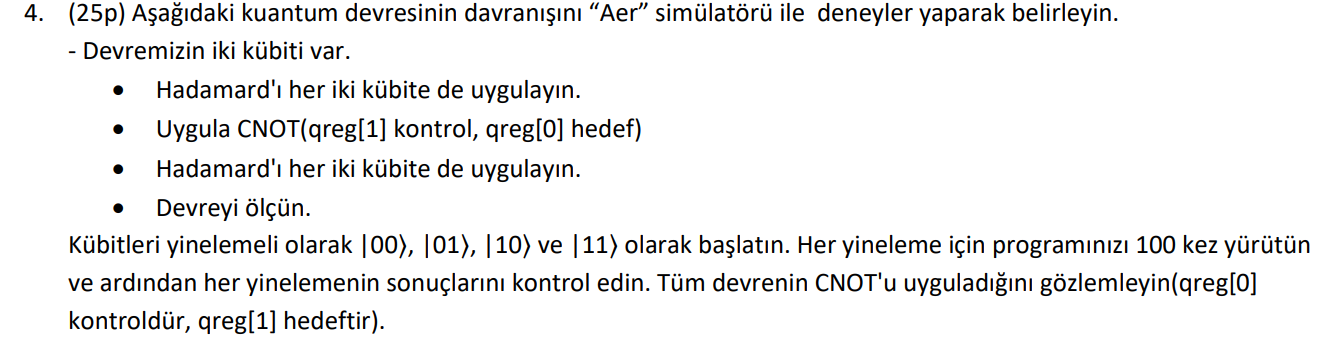

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute

# devrem
qc = QuantumCircuit(2, 2)

# Hadamard kapısı
qc.h(0)
qc.h(1)

# CNOT(qreg[1] control, qreg[0] target
qc.cx(1, 0)

# Hadamard kapısı
qc.h(0)
qc.h(1)

# Ölçüm
qc.measure([0, 1], [0, 1])

# Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Recursive kısım
for i in range(4):
    # devrem
    qc = QuantumCircuit(2, 2)

    # Kübitleri yinelemeli olarak |00⟩, |01⟩, |10⟩ ve |11⟩ olarak başlatın
    if i == 0:
        pass  # varsayılan başlangıç durumu |00⟩
    elif i == 1:
        qc.x(1)  # |01⟩
    elif i == 2:
        qc.x(0)  # |10⟩
    else:
        qc.x(0)
        qc.x(1)  # |11⟩

    # Hadamard kapısı
    qc.h(0)
    qc.h(1)

    # CNOT(qreg[1] kontrol, qreg[0] hedef
    qc.cx(1, 0)

    # Hadamard kapısı
    qc.h(0)
    qc.h(1)

    # Ölçüm
    qc.measure([0, 1], [0, 1])

    # Programı 100 kez yürütün
    shots = 100
    results = execute(qc, simulator, shots=shots).result()
    counts = results.get_counts()

    print(f"Iterasyon {i+1} sonuçları: {counts}")

plot_histogram(counts)
